In [10]:
import pandas as pd
import plotly.express as ex
import plotly.graph_objects as go
from scipy.signal import butter,filtfilt,find_peaks
import matplotlib.pyplot as plt 
import numpy as np

In [11]:
file = "..\\..\\DATA\\center_sternum.txt"
df = pd.read_table(file)
df['Tempo'] = pd.to_datetime(pd.to_numeric(df['Timestamp']),unit='s')
df['Tindex'] = df.index/200

#limitazione
df = df[(df['Tindex'] >= 10)&(df['Tindex']<=70)]

figu = ex.line(x=df['Tindex'],y=df['AccZ'])
figu.show()

fig_poco = ex.line(df[(df['Tindex'] >= 10)&(df['Tindex']<=13)],x='Tindex',y='AccZ')
fig_poco.show()


In [12]:
############################BUTTER SU ACCELEROMETRO##################################
b,a = butter(3,5,'lowpass', fs = 200)
result = filtfilt(b,a,df['AccZ'])
df_Accz = pd.DataFrame(result)
fig_accz = ex.line(df_Accz)
fig_accz.show()
############################BUTTER SU GIROSCOPIO#####################################
df_to_fil = df.copy()
b,a = butter(10,4,'lowpass', fs = 200)
result = filtfilt(b,a,df_to_fil['GyroX'])
df_res = pd.DataFrame(result)
fig_fil = ex.line(df_res)
fig_fil.show()


In [13]:
fig_2x = go.Figure()
fig_2x.add_trace(go.Scatter(x=(df.index)-2000,y=df['GyroX'],
                            opacity=0.5,
                            name = 'Segnale non filtrato'))
fig_2x.add_trace(go.Scatter(x=df_res.index,y=df_res[0],
                            name = 'Segnale filtrato'))

fig_2x.show()

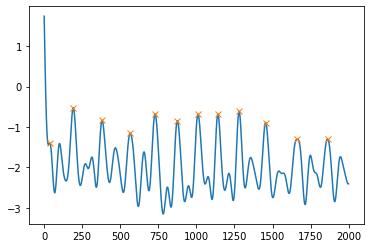

49.74545454545455

In [14]:
result = result[0:2000]

picchi, _ = find_peaks(result,height=-2,distance=100)
picchi

plt.plot(result)
plt.plot(picchi, result[picchi], "x")
plt.show()

(picchi[1:len(picchi)] - picchi[0:len(picchi) - 1]).mean()/200*60

# LEZIONE 27 APRILE

- decidere la lunghezza di un buffer in modo arbitrario
- riempire il buffer
- battiti al minuto nel buffer
- vedere l'output
- individuare qualche tecnica per capire se c'è o non c'è battito o se c'è solo rumore

In [15]:
#CICLO
WINDOW = 600


df_on_time = df.reset_index(drop=True)
buffer = np.zeros(WINDOW)
bufferRT = []

for jj in range(0,len(df)):
    index = jj % WINDOW
    buffer[index] = df_on_time.loc[jj,'GyroX']
    
    #Se siamo nell'ultima volta prima del reset
    if index == WINDOW - 1:
        picchi_buffer, _ = find_peaks(buffer,height=-2,distance=100)
        
    


# TITOLO 
    - HRV ad esempio

# TABELLA CONTENUTI (indice)

    1 - Introduzione
        Con indice magari
    2 - Related works
        con vari link delle fonti etc etc
    3 - Metodi
        Tutto diviso in cartelle metodi è data (quanti dati, come sono stati eseguiti, quanti soggetti, che soggetti, scala, frequenza campionamento)
    4 - Algoritmo
        Che filtro viene usata / che finestra temporale / come capire il segnale grezzo / assi usati
    5 - Grafici
        Istogramma(?) / plot dei battiti 
    6 - Conclusioni
        Dati / criticità / migliorie
    7 - Bibliografia

# LATEX






1 - Titolo (PPG/SCG)

2 - Scaletta (indice)

3 - Metodi

4 - Algoritmo

5 - Risultati con HR e HRvariability (heart rate variability)

6 - Conclusioni

In [83]:
file = "..\\..\\DATA\\Ostanello04-05-2022.txt"
df_m = pd.read_table(file)
df_m['Tempo'] = pd.to_datetime(pd.to_numeric(df['Timestamp']),unit='s')
df_m = df_m[1000:]

ex.line(df_m,y='PPG_IR.')

In [96]:
F_WINDOW = 100
F_FREQ_TRESH = [0.7, 3.5]
F_ELEM = 3

######################## BUTTER ################################
b,a = butter(F_ELEM,F_FREQ_TRESH,'bandpass', fs = F_WINDOW)
result = filtfilt(b,a,df_m['PPG_RED.'])
df_PPGIR = pd.DataFrame(result)
df_PPGIR[0] = df_PPGIR[0].rolling(10).mean()

'''fig_PPGIR = ex.line(df_PPGIR)
fig_PPGIR.show()'''

piccus, _ = find_peaks(df_PPGIR[0],height=-0.2,distance=65)

fig_PPGIR = go.Figure()
fig_PPGIR.add_trace(
    go.Scatter(x=df_PPGIR.index,y=df_PPGIR[0]))
fig_PPGIR.add_trace(
    go.Scatter(x=piccus,y=df_PPGIR[0][piccus],mode='markers'))
fig_PPGIR.show()

print(200/(piccus[1:len(piccus)]-piccus[0:len(piccus)-1]).mean()*60)

120.4310162687513
